In [237]:
# neural network classification in tensor flow.
# creating a data to view and fit it.
import tensorflow as tf
print(tf.__version__)

2.8.0


In [238]:
from sklearn.datasets import make_circles

# make 1000 examples.
n_samples = 1000

# create circles.
x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [239]:
# check out the features.
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [240]:
# see the labels first 10.
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [241]:
# make a dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1], "label":y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [242]:
# check out the different labels.
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

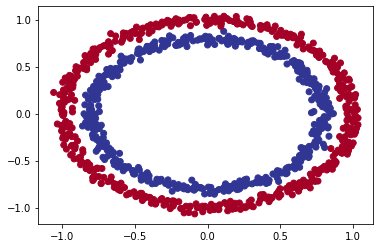

In [243]:
# vizualize a plot.
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c = y, cmap = plt.cm.RdYlBu);

In [244]:
# input and output shapes.
# check the shapes of our features and model 
x.shape, y.shape

((1000, 2), (1000,))

In [245]:
# check how many samples we have.
len(x), len(y)

(1000, 1000)

In [246]:
# view the first example of features.
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [247]:
# steps in modelling:

# set random seed:
tf.random.set_seed(42)

# create the model using the sequential API.
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile the model:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# fit the model:
model_1.fit(x, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [248]:
# train our model for longer period of time:
model_1.fit(x, y, epochs = 200, verbose = 0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [249]:
# steps in modelling_2:

# set random seed:
tf.random.set_seed(42)

# create the model using the sequential API.
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)])

# compile the model:
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])

# fit the model:
model_2.fit(x, y, epochs = 5, verbose = 0)

In [250]:
# evaluate the model:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7018 - accuracy: 0.4980


[0.7018195390701294, 0.49799999594688416]

In [251]:
# improve a model:
# set random seeds
tf.random.set_seed(42)

# create the model:
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100, input_shape = (None, 1)),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

# compile the model:
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model:
model_3.fit(x, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.3571 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.4915
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5044
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4928
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4865
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5131
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4978
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4926
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5023
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5089
Epoch 11/

In [252]:
import numpy as np
def plot_decision_boundary(model,X,y):

  # define the axis boundaries of a plot and create a meshgrid
  x_min,x_max = X[:,0].min() -.1, X[:,0].max()+.1
  y_min,y_max = X[:,1].min() -.1, X[:,1].max()+.1
  xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  # create X values
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make prediction using the trained model
  y_pred = model.predict(x_in)

  # check for the multi class
  if len(y_pred[0])>1:
    print('Doing multiclass classification...')
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print('Doing binary classification...')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = .7)
  plt.scatter(X[:,0], X[:,1],c = y, s = 40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing multiclass classification...


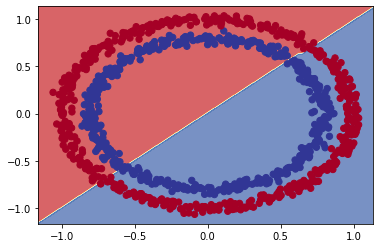

In [253]:
# check out the prediction our model is making:
plot_decision_boundary(model_3, x, y)

In [254]:
# set random seeds
tf.random.set_seed(42)

# create some regression data;
x_regression = np.arange(0, 1000, 5)
y_regression = np.arange(0, 1000, 5)

# split into a training and test dataset
x_reg_train = x_regression[:150]
x_reg_test = x_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# fit our moels to the data:
model_3.fit(tf.expand_dims(x_reg_train, axis = -1),
            y_reg_train,
            epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: -3111.7009 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: -5629.4053 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: -5637.6602 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: -5665.0918 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: -5665.0923 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: -5665.0923 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: -5665.0918 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -5665.0918 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: -5665.0923 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

In [255]:
model_3.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_133 (Dense)           (None, None, 100)         200       
                                                                 
 dense_134 (Dense)           (None, None, 10)          1010      
                                                                 
 dense_135 (Dense)           (None, None, 1)           11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [256]:
# set up the random model
tf.random.set_seed(42)

# recreate the model
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])

# change the loss and metrics of our compile model:
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# fit the model;
model_3.fit(tf.expand_dims(x_reg_train, axis = -1),
            y_reg_train,
            epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 148.2158 - mae: 148.2158
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 40.6552 - mae: 40.6552
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 28.4548 - mae: 28.4548
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 13.7264 - mae: 13.7264
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 24.5753 - mae: 24.5753
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 10.4157 - mae: 10.4157
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 9.1379 - mae: 9.1379
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 9.2649 - mae: 9.2649
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 5.0359 - mae: 5.0359
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 3.1257 - mae: 3.1257
Epoch 11/100
5/5 [==============================] - 0s 6ms/step -

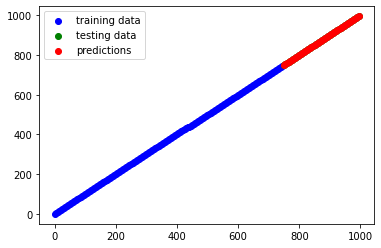

In [257]:
# make predictions with our trained model:
y_reg_preds = model_3.predict(y_reg_test)

# plot the model prediction against our regression model:
plt.scatter(x_reg_train, y_reg_train, c = 'b', label = 'training data')
plt.scatter(x_reg_test, y_reg_test, c = 'g', label = 'testing data')
plt.scatter(x_reg_test, y_reg_preds.squeeze(), c = 'r', label = 'predictions')
plt.legend();

In [258]:
# set random seeds
tf.random.set_seed(42)

# create teh model
model_4= tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.keras.activations.linear), # linear because the graph looks linear
                               tf.keras.layers.Dense(1)])

# change the loss and metrics of our compile model:
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = .001),
                metrics = ['accuracy'])

# fit the model;
history = model_4.fit(x, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11/100
32/32 [=

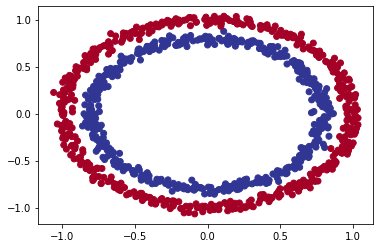

In [259]:
# check out our data:
plt.scatter(x[:,0], x[:,1], c = y, cmap = plt.cm.RdYlBu)

Doing binary classification...


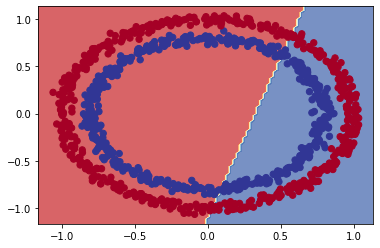

In [260]:
# check the decision boundary;
plot_decision_boundary(model_4, x, y)

In [261]:
# set random seeds
tf.random.set_seed(42)

# create teh model
model_5 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1)])

# change the loss and metrics of our compile model:
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = .001),
                metrics = ['accuracy'])

# fit the model;
history = model_5.fit(x, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 1.8377 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4449 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3410 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2678 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2116 - accuracy: 0.4390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1664 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.4250
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0970 - accuracy: 0.4420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0670 - accuracy: 0.4540
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0407 - accuracy: 0.4550
Epoch 11/100
32/32 [=

Doing binary classification...


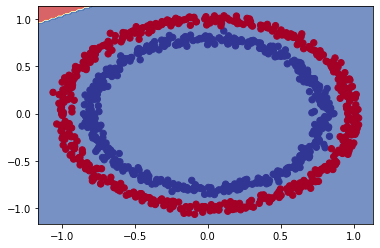

In [262]:
# check the decision boundary;
plot_decision_boundary(model_5, x, y)

In [263]:
# set random seeds
tf.random.set_seed(42)

# create teh model
model_6 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu), 
                               tf.keras.layers.Dense(1)])

# change the loss and metrics of our compile model:
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = .001),
                metrics = ['accuracy'])

# fit the model;
history = model_6.fit(x, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
32/32 [=

Doing binary classification...


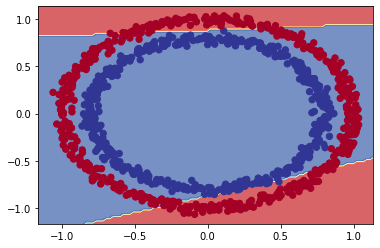

In [264]:
# check the decision boundary;
plot_decision_boundary(model_6, x, y)

In [265]:
# set random seeds
tf.random.set_seed(42)

# create teh model
model_7 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu), 
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)])

# change the loss and metrics of our compile model:
model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = .001),
                metrics = ['accuracy'])

# fit the model;
history = model_7.fit(x, y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

In [266]:
# evaluate the model:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing binary classification...


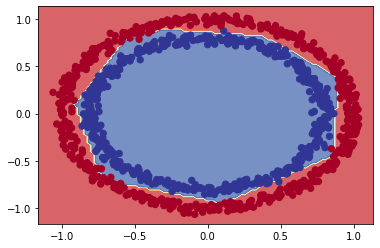

In [267]:
# check the decision boundary: view predictions of the model with relu and sigmoid activation.
plot_decision_boundary(model_7, x, y)

In [268]:
# create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

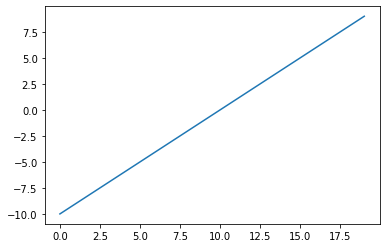

In [269]:
plt.plot(A)

In [270]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

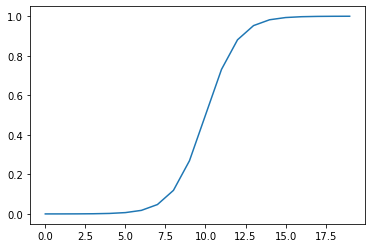

In [271]:
plt.plot(sigmoid(A))

In [272]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

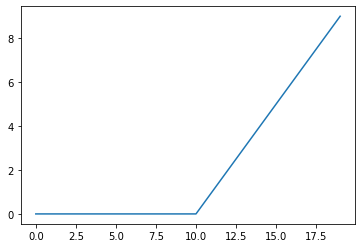

In [273]:
plt.plot(relu(A))

In [274]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [275]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [276]:
# evaluating and improving our classification model.
# how amny examples are in the whole data set:
len(x)

1000

In [277]:
# split data into train and test
x_train, y_train = x[:800], y[:800] # 80% of the data for the training set
x_test, y_test = x[800:], y[800:] # 20% of the data for the test set

# check the shapes of the data:
x_train.shape, x_test.shape

((800, 2), (200, 2))

In [278]:
# set random seed:
tf.random.set_seed(42)

# create teh model
model_8 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'), 
                               tf.keras.layers.Dense(1, activation = 'sigmoid')])

# change the loss and metrics of our compile model:
model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = .01),
                metrics = ['accuracy'])

# fit the model
history = model_8.fit(x_train, y_train, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [279]:
# evaluate our model on the test set;
loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
model loss on the test set: 0.12468849867582321
model accuracy on the test set: 100.00%


Doing binary classification...
Doing binary classification...


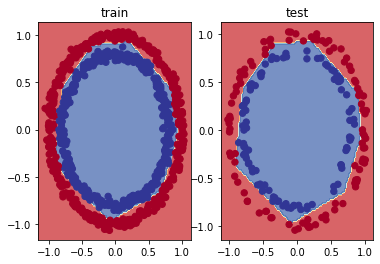

In [280]:
# plot the decision boundaries for the train and test set:

plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_8, X = x_train, y = y_train)

plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_8, X = x_test, y = y_test)

plt.show()

Text(0.5, 1.0, 'model_8 training curves')

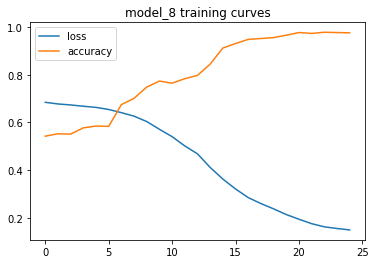

In [281]:
# plot the loss curves:
pd.DataFrame(history.history).plot()
plt.title('model_8 training curves')

In [282]:
# set random seed:
tf.random.set_seed(42)

# create the model
model_9 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'), 
                               tf.keras.layers.Dense(1, activation = 'sigmoid')])

# change the loss and metrics of our compile model:
model_9.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = .001),
                metrics = ['accuracy'])
# create a learning rate scheduler callback:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
# fit the model;
history = model_9.fit(x_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - ac

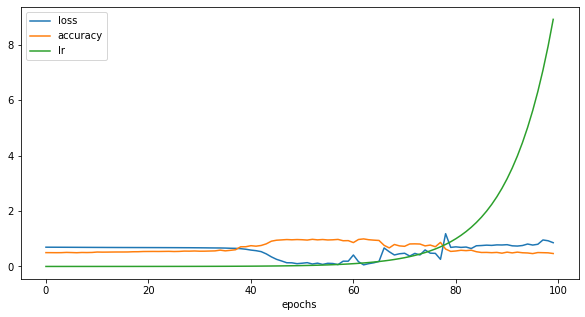

In [283]:
# check the history of epochs:
pd.DataFrame(history.history).plot(figsize = (10, 5), xlabel='epochs')

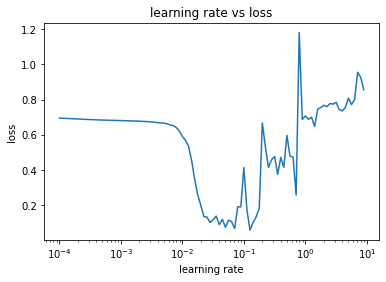

In [284]:
# plot the learning rate vs the ,loss ;
lrs = 1e-4*(10**(np.arange(100)/20))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss');

In [285]:
# set random seed:
tf.random.set_seed(42)

# create teh model
model_10 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'), 
                               tf.keras.layers.Dense(1, activation = 'sigmoid')])

# change the loss and metrics of our compile model:
model_10.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(lr = .02),
                metrics = ['accuracy'])

# fit the model
history = model_10.fit(x_train, y_train, epochs = 20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [286]:
# evaluate the model on test data:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Doing binary classification...
Doing binary classification...


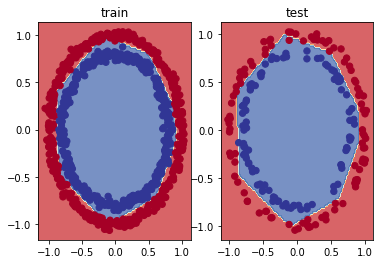

In [287]:
# plot the decision boundaries for the train and test set:

plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_10, X = x_train, y = y_train)

plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_10, X = x_test, y = y_test)

plt.show()

In [288]:
# check accuracy of model:
loss, accuracy = model_10.evaluate(x_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
model loss on the test set: 0.05740184709429741
model accuracy on the test set: 99.00%


In [289]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
#y_preds = model_10.predict(x_test)

# create confusion matrix
#confusion_matrix(y_test, y_preds)

# this code will give error : ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [290]:
# examine the error
y_test

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0])

In [291]:
y_preds

array([[9.85265374e-01],
       [9.99237895e-01],
       [9.90323484e-01],
       [9.97069418e-01],
       [3.96229774e-01],
       [1.81269348e-02],
       [9.68290687e-01],
       [1.97467208e-02],
       [9.99671698e-01],
       [5.64604998e-04],
       [9.72873628e-01],
       [2.71522194e-01],
       [9.92272019e-01],
       [9.27265525e-01],
       [9.98101592e-01],
       [9.91818786e-01],
       [9.91739690e-01],
       [9.33626771e-01],
       [4.25938964e-02],
       [9.91493583e-01],
       [1.49991810e-02],
       [9.32794929e-01],
       [9.92896199e-01],
       [9.73198414e-01],
       [4.26525003e-05],
       [9.21439886e-01],
       [9.65749145e-01],
       [2.41607308e-01],
       [1.93991065e-02],
       [9.98130977e-01],
       [1.44242942e-02],
       [9.44148898e-01],
       [9.86896753e-01],
       [1.23808295e-01],
       [2.88016796e-02],
       [9.63382125e-01],
       [9.98146296e-01],
       [9.63414907e-01],
       [9.95050430e-01],
       [9.88492191e-01],


In [292]:
# covert the probabilities to binary  formatand view the first 10;
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [293]:
# create a confusion matrix:
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

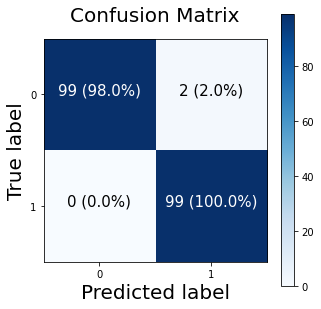

In [294]:
import itertools

figsize=(5, 5)

## create confusion matrix
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] ## normalize it
n_classes = cm.shape[0]

## prettify it
fig,ax = plt.subplots(figsize=figsize)
## create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

## create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

## label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

## set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

## adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

## set threshold for different colors
threshold = (cm.max()+cm.min())/2.

## plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]>threshold else 'black',
           size = 15)

In [295]:
# what does itertools.product do? combine two things into each other combination;


In [296]:
from tensorflow.keras.datasets import fashion_mnist

# the data set has already been sorted into train and test set for us;
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [297]:
# show the first training example:
print(f'training sample:\n{train_data[0]}\n')
print(f"training label:{train_labels[0]}")

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [298]:
# create the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

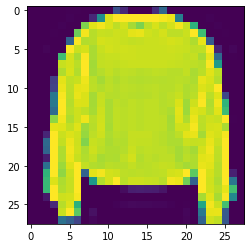

In [299]:
# plot a single example

plt.imshow(train_data[7])

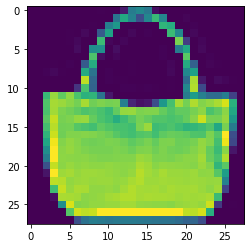

In [300]:
 plt.imshow(train_data[100])

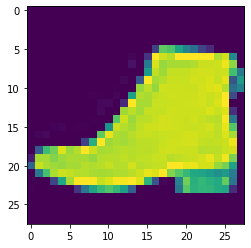

In [301]:
 plt.imshow(train_data[7000])

In [302]:
# check our sample label
train_labels[7]

2

In [303]:
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandle', 'shirt', 'sneaker', 'bag', 'ankle_boot']

# how many classes are there will be output shape:
len(class_names)

10

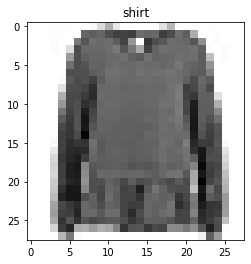

In [304]:
# plot an example image and its label;
plt.imshow(train_data[18], cmap = plt.cm.binary) # change the colors to black and white
plt.title(class_names[train_labels[18]]);

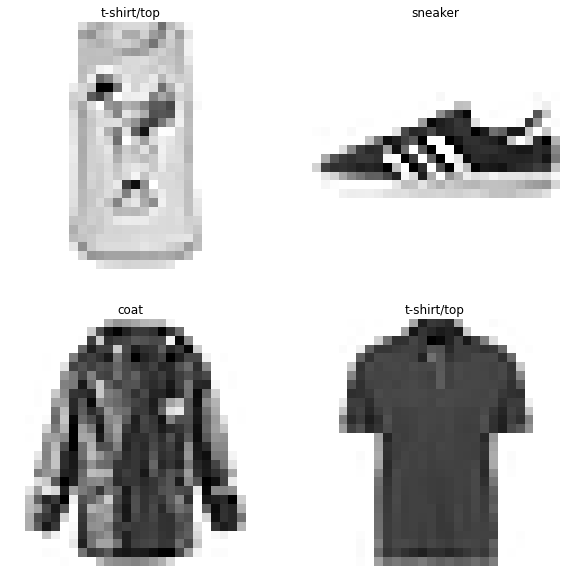

In [305]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(10, 10))

for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data))) 
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary) 
  plt.title(class_names[train_labels[rand_index]]) 
  plt.axis(False)

In [306]:
# set random seed:
tf.random.set_seed(42)

# create teh model
model_11 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                               tf.keras.layers.Dense(4, activation = 'relu'), 
                               tf.keras.layers.Dense(4, activation = 'relu'), 
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# change the loss and metrics of our compile model:
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
non_norm_history = model_11.fit(train_data, 
                                train_labels, 
                                epochs = 10, 
                                validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [307]:
model_11.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_158 (Dense)           (None, 4)                 3140      
                                                                 
 dense_159 (Dense)           (None, 4)                 20        
                                                                 
 dense_160 (Dense)           (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [308]:
# check the min and max of train data set
train_data.min(), train_data.max()

(0, 255)

In [309]:
# divide the train and test images by the max values (normalize it)
train_data = train_data/255.0
test_data = test_data/255.0

# check the min and max of train data set
train_data.min(), train_data.max()

(0.0, 1.0)

In [310]:
# set random seed:
tf.random.set_seed(42)

# create teh model
model_12 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                               tf.keras.layers.Dense(4, activation = 'relu'), 
                               tf.keras.layers.Dense(4, activation = 'relu'), 
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# change the loss and metrics of our compile model:
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# fit the model
norm_history = model_12.fit(train_data, 
                                train_labels, 
                                epochs = 10, 
                                validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

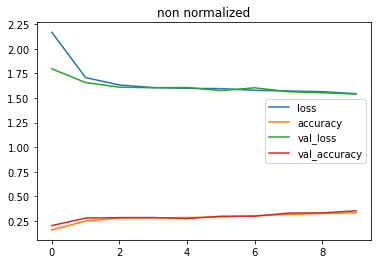

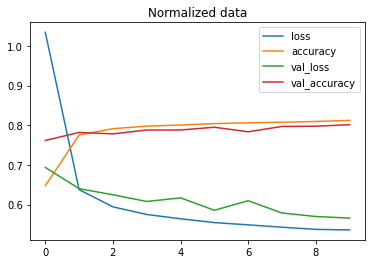

In [311]:
# plot non normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = 'non normalized')

# plot normalised data loss curve
pd.DataFrame(norm_history.history).plot(title = 'Normalized data');

In [323]:
# set random seed
tf.random.set_seed(42)

# create the model
# Combination of linear and non-linear activation function
model_13 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')])

# compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data,
                      train_labels,
                      epochs = 40, ## model is already doing pretty good
                      validation_data=(test_data,test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9126 - accuracy: 0.3121 - val_loss: 1.6130 - val_accuracy: 0.4120 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3422 - accuracy: 0.5300 - val_loss: 1.1290 - val_accuracy: 0.6441 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9738 - accuracy: 0.6798 - val_loss: 0.9039 - val_accuracy: 0.6927 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8289 - accuracy: 0.7134 - val_loss: 0.8146 - val_accuracy: 0.7149 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7603 - accuracy: 0.7366 - val_loss: 0.7615 - val_accuracy: 0.7366 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7181 - accuracy: 0.7506 - val_loss: 0.7296 - val_accuracy: 0.7448 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0.5, 1.0, 'finding the ideal learning rate')

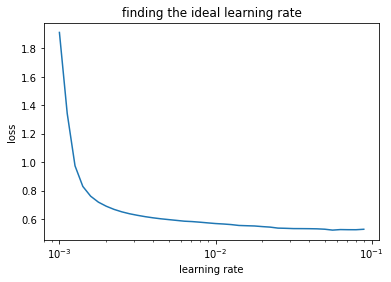

In [324]:
# plot the learning rate decay curve
lrs = 1e-3*(10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('finding the ideal learning rate')

In [327]:
# set random seed
tf.random.set_seed(42)

# create the model
# Combination of linear and non-linear activation function
model_14 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')])

# compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

# create a learning rate callback scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# fit the model
history = model_14.fit(train_data,
                      train_labels,
                      epochs = 20,
                      validation_data=(test_data,test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [328]:
def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10, 10), text_size = 15):
  # create a confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float')/ cm.sum(axis = 1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # plot the figure  and make it better
  fig, ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # are there a list of classes;
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  # label the axes
  ax.set(title = "confusion_matrix",
         xlabel = 'predicted label',
         ylabel = 'true labels',
         xticks = np.arange(n_classes),
         yticks = np.arange(n_classes),
         xticklabels = labels,
         yticklabels = labels)
  
  # make a x axis labels appear on the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # set the threshold for different colors
  threshold = (cm.max()+ cm.min())/2

  # plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment = "center",
             color = "white" if cm[i, j]> threshold else "black",
             size = text_size)

In [329]:
# make prediction with the most recent model:
y_probs = model_14.predict(test_data)

# view the first 5 prediction
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

In [331]:
# see the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'ankle_boot')

In [332]:
# convert all of the prediction from probabilities to labels
y_preds = y_probs.argmax(axis = 1)

# view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [333]:
# check a non prettified confusion matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

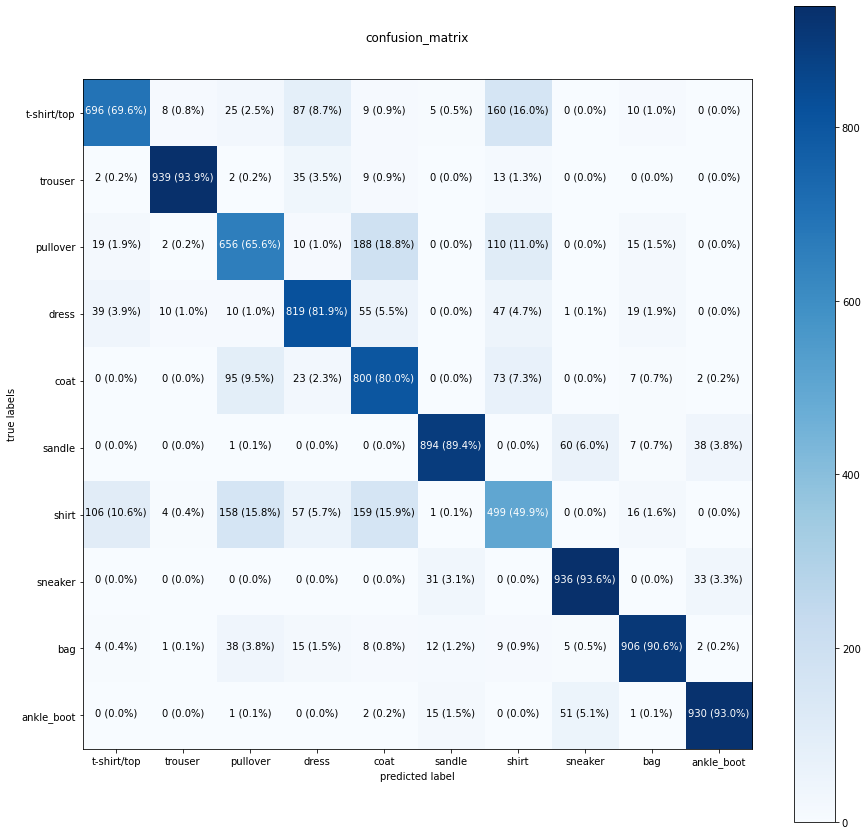

In [343]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15, 15),
                      text_size = 10)

In [350]:
def plot_random_image(model, images, true_labels, classes):
  # set up a random integer
  i = random.randint(0, len(images))

  # creating the predictions and targets 
  target_images = images[i]
  pred_probs = model.predict(target_images.reshape(1, 28, 28))
  pred_labels = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the target image
  plt.imshow(target_images, cmap = plt.cm.binary)

  # change the color of the titles depending on if the prediction id right or wrong
  if pred_labels == true_label:
    color = 'green'
  else:
    color = 'red'

  # add xlabel information prediction
  plt.xlabel('Pred: {} {:2.0f}% (True; {})'.format(pred_labels,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)

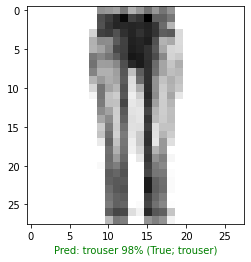

In [351]:
# check out random image as well as its predictions
plot_random_image(model = model_14,
                  images = test_data,
                  true_labels = test_labels,
                  classes = class_names)

In [352]:
# find the layers of out most recent model
model_14.layers

In [353]:
model_14.layers[1] # extracting first layer

In [364]:
# patterens in our model
weights, biases = model_14.layers[1].get_weights()

In [366]:
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [367]:
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

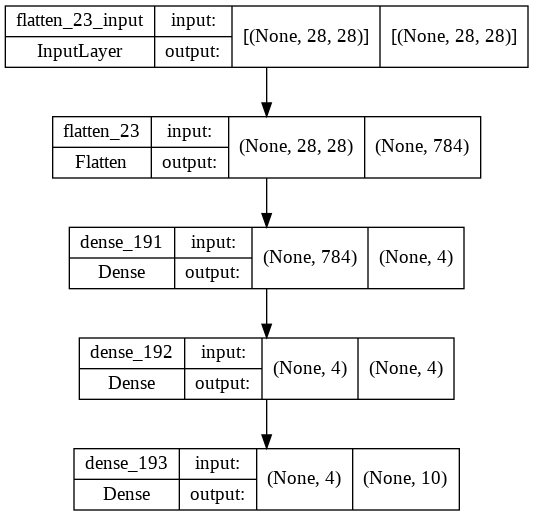

In [363]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes = True) # see the inputs and outputs of each layers